<a href="https://colab.research.google.com/github/shaobingbing/AI-For-NLP/blob/master/word_process%26search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Word2vec


In [0]:
import pandas as pd
import re
import jieba

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def token(string):
    return re.findall(r'[\w|\d]+', string)

def cut(string):
    # cut sentences
    return ' '.join(jieba.cut(string))

In [0]:
origin_news_content = pd.read_csv('./drive/My Drive/data/sqlResult_1558435.csv', encoding = 'gb18030')

In [5]:
origin_news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [0]:
content = origin_news_content.fillna('')

In [0]:
news_content = content['content'].tolist()

In [10]:
content_1 = [token(n) for n in news_content]
content_2 = [' '.join(n) for n in content_1]
news_content = [cut(n) for n in content_2]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.882 seconds.
Prefix dict has been built succesfully.


In [11]:
content_2[1:10]

['骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台',
 '此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车 新华社记者张立云摄',
 '原标题 44岁女子跑深圳约会网友被拒 暴雨中裸身奔走 深圳交警微博称 昨日清晨交警发现有一女子赤裸上身 行走在南坪快速上 期间还起了轻生年头 一辅警发现后赶紧为其披上黄衣 并一路劝说她 那么事发时 到底都发生了些什么呢 南都记者带您一起还原现场 南都记者在龙岗大队坂田中队见到了辅警刘青 发现女生的辅警 一位外表高大帅气 说话略带些腼腆的90后青年 刘青介绍 6月16日早上7时36分 他正在环城南路附近值勤 接到中队关于一位女子裸身进入机动车可能有危险的警情 随后骑着小铁骑开始沿路寻找 大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子 女子身上一丝不挂地逆车流而行 时走时停 时坐时躺 险象环生 刘青停好小铁骑 和另外一名巡防员追了上去 发现女子的情绪很低落 话不多 刘青尝试和女子交流 劝说女子离开 可女子并不愿意接受 继续缓慢地往南坪快速路的主干道上走去 此时路边上已经聚集了很市民围观 为了不刺激女子的情

In [0]:
with open('./drive/My Drive/data/news_sentences_cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')    

In [0]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [43]:
news_word2vec_model = Word2Vec(LineSentence('./drive/My Drive/data/news_sentences_cut.txt'), size = 35, workers = 8)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [46]:
news_word2vec_model.save('./drive/My Drive/model/news_word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
model = Word2Vec.load('./drive/My Drive/model/news_word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from collections import defaultdict
def get_related_words(initial_word, model, topn = 20):
    
    unseen = initial_word
    seen = defaultdict(int)
    
    max_size = 500
    
    while unseen and len(seen) < max_size:
        if len(seen)% 50 == 0:
            print("seen length : {}".format(len(seen)))
            
        node = unseen.pop(0)
        new_expanding = [w for w,s in model.most_similar(node, topn = topn)]
        unseen += new_expanding
        
        seen[node] += 1
    return seen

In [97]:
related_words = get_related_words(['说', '表示'], model)

seen length : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


seen length : 50
seen length : 50
seen length : 50
seen length : 100
seen length : 150
seen length : 200
seen length : 250
seen length : 300
seen length : 350
seen length : 400
seen length : 450


### TD-IDF

In [0]:
import math

def document_frequency(word, document):
    return sum(1 for n in news_content if word in n)

def idf(word, document):
    return math.log10(len(news_content)/document_frequency(word, document))
           

In [0]:
def tf(word, document):
    words = document.split()
    return sum(1 for w in words if w == word)   

In [0]:
def get_key_word_of_document(document, all_document):
    words = set(document.split())
    
    tfidf = [(w, tf(w, document) * idf(w, all_document)) for w in words]
    
    tfidf = sorted(tfidf, key = lambda x: x[1], reverse = True)
    
    return tfidf

In [18]:
get_key_word_of_document(news_content[11], news_content)[:10]

[('市场', 21.353584391728972),
 ('股指', 18.198034968575843),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426)]

### wordcloud

In [0]:
import wordcloud

In [0]:
wc = wordcloud.WordCloud('./drive/My Drive/font/SourceHanSerifSC-Regular.otf')

In [21]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
machine_new_keywords = get_key_word_of_document(news_content[101], news_content)

In [24]:
machine_new_keywords[1:10]

[('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277901),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247)]

In [0]:
machine_news_keywords_dict = {w:score for w, score in machine_new_keywords}

In [26]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



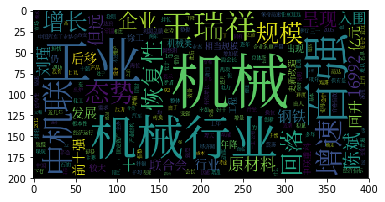

In [27]:
plt.imshow(wc.generate_from_frequencies(machine_news_keywords_dict))

In [0]:
shenzhen_social_news = get_key_word_of_document(news_content[4], news_content)

In [0]:
from PIL import Image

In [0]:
import numpy as np

In [0]:
duola_mask = np.array(Image.open('./drive/My Drive/data/duola.jpg'))

In [0]:
wordcloud_with_mask = wordcloud.WordCloud(font_path = './drive/My Drive/font/SourceHanSerifSC-Regular.otf', mask=duola_mask)

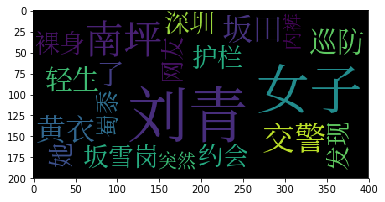

In [33]:
plt.imshow(wc.generate_from_frequencies({w:s for w,s in shenzhen_social_news[:20]}))

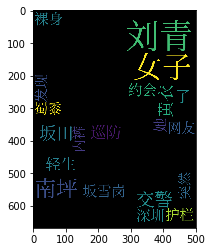

In [34]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

### TF_IDF vectorized

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorized = TfidfVectorizer(max_features = 10000)

In [0]:
x = vectorized.fit_transform(news_content)

In [38]:
x.shape

(89611, 10000)

In [39]:
np.where(x[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  35,   47,  293,  899,  921, 1529, 1717, 1792, 1814, 2522, 2605,
        2699, 3976, 4122, 4140, 4407, 4514, 4537, 4807, 4875, 5633, 5738,
        5758, 5804, 5884, 6193, 6886, 7321, 7340, 7613, 7675, 9060, 9114,
        9615]))

In [0]:
import random

In [0]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [42]:
document_id_1

699

In [43]:
document_id_2

326

In [44]:
news_content[document_id_1]

'原 标题   安徽 理工大学 学位证书 封面 漏印 字母 校方 收回   去年 曾 印错 内 页   今年 安徽 理工大学 学位证书 封面 上 的 英文单词   bachelor   注   学士   被 印成   bacheor   且 去年 该校 学位证书 内页 曾 出过 错误   6 月 19 日   安徽 理工大学 有关 负责人 告诉 澎湃 新闻   目前   印刷错误 的 学位证书 封面 已 全部 收回   新 的 封面 已 赶制 完成   并 分发 至 各 学院   6 月 17 日   网友   淮南 直播   发帖 称   有 安徽 理工大学 学生 反映   该校 今年 部分 学位证书 封面 上 的 英文单词   bachelor   被 印成   bacheor   并称 该校 学位证书 封面 出错 已经 不是 第一次   2016 年 学位证书 内页 曾 出现 过 错误   当时 被 紧急 收回   澎湃 新闻 注意 到   有 疑似 该校 学生 评论 称   这 很安理   安徽 理工大学   6 月 20 日   安徽 理工大学 研究生院 常务副 院长   党委 研 工部 部长 兼 学位 办公室 主任 徐颖向 澎湃 新闻 表示   6 月 16 日 下午 学位证书 封面 由 各 学院 领走   但 并未 发放 给 学生   每个 学院   都 是 原封不动 地 放在 那里   化学 工程学院 几个 学生 拿出 来看 了 看   发现 了 错误   徐颖 说   对于 印错 的 原因   徐颖 表示   学校 提供 的 设计图 没有 问题   可能 是 负责 印刷 的 浙江 某 印刷厂 校对   排版 出现 错误   印错 一个 字母 也 很 正常 啊   徐颖向 澎湃 新闻 表示   6 月 16 日 当晚 已 连夜 联系 印刷厂 家   6 月 17 日 上午 厂家 已 开始 重新 印刷   6 月 19 日 上午 已 将 新 印刷 的 学位证书 封面 运来   明天   6 月 21 日   上午 开 毕业典礼   今天 或 明天 各 学院 会 把 学位证书 封面 发放 给 学生   毕业证书 和 学位证书 内 页 明天 上午 才 会发   针对 去年 该校 学位证书 被 指内页 曾 出错   徐颖称   去年 内 页 出错 只是 极个

In [45]:
news_content[document_id_2]

'原 标题   家庭 摄像头 遭 入侵   关键 是 厂家 责任 缺失   网络 上 针对 个人信息   隐私 的 各种 违法   侵权 乃至 犯罪行为 为何 屡禁不止   监管部门 以及 大型 网络平台 失责 是 重要 原因   近日   据 央视 报道   大量 家庭 摄像头 遭 非法 入侵   令 原本 私密 的 家庭 生活 场景   被 陌生人 所 偷窥   猎奇   此 消息 一出   顿时 让 很多 人 感到 惊恐 与 愤怒   事实上   从 厂商   黑客 到 监管部门   再 到 网络 上 的   内容   平台 和 传播者   现有 法律 已经 设置 了 一道 严密 的 防火墙   在 生产 和 销售 环节   如果 家庭 摄像头 是因为 产品质量 而 遭受 入侵   则 厂家 和 商家 需要 承担 相应 的 法律责任   根据   消费者 权益保护法   的 规定   经营者 应当 保证 其 提供 的 商品 或 服务 符合 保障 人身   财产 安全 的 要求   隐私权 便是 重要 的 一项 人身权利   对于 家庭 摄像头 来说   其 产品质量 不 只 限于 实体 的 摄像 清晰 程度   使用 期限   同样 也 包括 内置 软件 的 安全性 和 配置 方案 的 合理性   而 一些 网络 摄像头 可能 由于 软件 安全 的 问题   存在 漏洞   容易 被 黑客攻击 入侵   根据   网络安全 法   第六十条 的 规定   网络 产品 生产厂家 对 其 产品   服务 存在 安全 缺陷 和 漏洞 的   应当 立即 采取 补救措施   因此   家庭 摄像头 的 配套 软件 如果 存在 安全漏洞   同样 属于 厂商 的 产品质量 问题   受害人 可以 向 摄像头 厂商 提起 民事 侵权 索赔   此外   一些 用户 可能 在 使用 家庭 摄像头 时 设置 不当   使用 默认 或是 过于 简单 的 账号 和 密码   这 同样 也 能 导致 摄像头 被 入侵   对于 这种 情况   假如 厂商 在 销售 产品 时 没有 配备 详细 的 说明书   同样 需要 承担 用户 受损 的 产品质量 责任   对于 黑客 来说   同样 面临 多重 的 法律制裁   近年来 尤其 强调 打击 侵犯 公民 个人信息 的 犯罪行为  

In [0]:
vector_id_1 = x[document_id_1].toarray()
vector_id_2 = x[document_id_2].toarray()

In [47]:
random_choose = random.randint(0, 1000)
random_choose

971

In [48]:
news_content[random_choose]

'央广网 北京 6 月 23 日 消息   据 中国 之声   新闻 和 报纸 摘要   报道   从 21 日 开始   华北 迎来 入汛 来 最强 的 一次 降雨 过程   中央气象台 昨天   22 日   18 点 继续 发布 暴雨 黄色 预警   预计 到 今天   23 日   晚上   河北 东部   北京   天津   山东 北部 等 北方 部分 地区 仍 有 大到暴雨   其中 天津 北部 等 地 局地 有 大暴雨   同时   今天   23 日   起   长江 中下游 安徽   江苏   浙江 等 地 将 迎来 较 强降雨   为 应对 入汛 以来 最强 的 一次 降雨   京津冀 严阵以待   北京 昨天   22 日   起 迎来 阵雨   气温 骤降   在 北京 大兴 榆 垡   降雨量 60   4 毫米   达到 暴雨 级别   北京市 防汛 办 新闻 发言人 刘 宏伟 介绍   已 启动 防汛 三级 应急 响应   关闭 58 家 景区   刘 宏伟   对 城区 的 易 积水 点 进行 了 重点 布控   延庆 和 门头沟 两个 区县 一共 转移 7100 多人   在 河北   保定   石家庄 等 地 遭受 暴雨 袭击   36 个 县 出现 8 级 以上 大风   108 个 县 出现 雷暴   保定 市区 和 曲阳县 等 地 出现 冰雹   受 暴雨 影响   石家庄   保定 等 地 山区 的 旅游 景区 关闭 河北省 防汛 抗旱 指挥部 启动 防汛 IV 级 应急 响应   河北省 防汛 抗旱 指挥部 办公室 督查 专员 魏国 忠 表示   我们 省 67 个 山区县 全部 建成 了 山洪 灾害 预警 平台   当地 乡村干部 会 根据 预警 信息 及时 组织 群众 及时 转移   对于 18 座 大型 水库   我们 正在 采取措施 积极 调度 泄水   自 6 月 20 日 以来   河南 南阳   安阳   新乡 多地 出现 降雨 过程   部分 城市 遭遇 强对流 天气   在 河南 南阳 唐河县   暴风雨 伴随 冰雹 袭击 农田   给 当地 农民 造成 严重 经济损失   唐河县 桐寨 铺 福田 农业 合作社 莲藕 种植 基地 负责人 李丰瑞   3000 多亩 莲藕 的 叶子 都 是 齐头 折断  

In [0]:
from scipy.spatial.distance import cosine

In [0]:
def distance(v_1, v_2):
    return cosine(v_1, v_2)

In [52]:
distance([1,1], [2,2])

0.0

In [53]:
distance([1,1], [-1,1])

1.0

In [54]:
distance(x[random_choose].toarray()[0], x[document_id_1].toarray()[0])

0.908686878753848

In [55]:
distance(x[random_choose].toarray()[0], x[document_id_2].toarray()[0])

0.9786753959220656

In [56]:
distance(model['说'], model['表示'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


0.10524886846542358

In [57]:
y = sorted(list(range(10000)), key=lambda i: distance(x[random_choose].toarray()[0], 
                                      x[i].toarray()[0]))

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [58]:
y[:10]

[971, 2725, 308, 7, 13, 92, 78, 48, 42, 108]

In [60]:
distance(x[random_choose].toarray()[0], x[971].toarray(0))

0.0

### Build a search engine

> Input: Words    
Output: Documents 

In [0]:
def naive_search(keywords, all_document):
    news_ids = [i for i,n in enumerate(all_document) if all(w in n for w in keywords)]
    return news_ids

In [0]:
# %%timeit
news_id = naive_search('美军 司令 航母'.split(), news_content)

In [63]:
len(news_content)

89611

In [64]:
x.shape

(89611, 10000)

In [0]:
transposed_x = x.transpose().toarray()

In [0]:
word_2_id = vectorized.vocabulary_

In [0]:
id_2_word = {d:w for w,d in word_2_id.items()}

In [0]:
from functools import reduce
from operator import and_

def search_engine(query):
    words = query.split()    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
   
    
    candidates_ids = [word_2_id[w] for w in words]
    document_ids = [set(np.where(transposed_x[_id])[0]) for _id in candidates_ids]
    merged_document = reduce(and_, document_ids)
    
    sorted_document_id = sorted(merged_document, key = lambda i: distance(query_vec, x[i].toarray()))
    
    return sorted_document_id

In [117]:
search_engine('美联储 加息 次数')

[2189]

In [128]:
print(news_content[2189])

6 月 15 日 凌晨   是 美联储 公布 利率 决议 的 时刻   截至 发稿   联邦 基金 利率 期货 蕴含 的 加息 概率 为 100   但 多位 分析 人士 告诉 中国 证券报 记者   目前 而言   单纯 从 加息 的 角度看   市场 已经 充分 定价   此次 会议 透露 出来 的 美联储 对 下半年 加息 和 缩表 的 态度 将 成为 接下来 市场 关注 焦点   此外   大宗 商品 近期走势 与 美元 相关性 走弱   未来 也 将 更 多 受 国内 基本面 主导   并 趋向 震荡 偏弱   市场 聚焦 美联储   在 美联储 利率 决议 公布 前夕 的 紧张 气氛 中   黄金 屏息以待   本周 来 持续 窄幅 震荡   截至 昨日   COMEX 黄金 期货 主力 报收 1269   7 美元   盎司   与此同时   原油期货 震荡 区间 也 明显 收窄   而 在 此前   黄金   原油期货 均 出现 明显 跌幅   南华 宏观 章 睿哲 表示   目前 美联储 加息 已 被 市场 充分 预期   周四 重点 关注 美联储 对 下半年 几次 议息 会议 的 态度   如果 态度 不够 鹰派   那么 美元 可能 还会 下行   黄金 短期内 还会 上涨   如何 看待 美联储 货币政策 后续 走势   当前 市场 的 核心 焦点 在 美联储 对 下半年 加息 和 缩表 的 态度   浙商 期货 研究 中心 首席 宏观 分析师 洪 清源 表示   6 月 美联储 加息 基本 被 市场 充分 预期   议息 会议 前 市场 预期 的 加息 概率 就 已 高达 99   加息 本身 对 市场 的 冲击 并不大   从 当前 美国 经济 基本面 看   补 库存 周期 进入 尾声   薪资 增长 放缓   消费 后继 增长 乏力   经济 复苏 面临 一定 压力   特朗普 政策 是 当前 美国 经济 最大 的 不 确定 因素   其 减税 和 基建 刺激 计划 有利于 提振 私人 部门 投资   但 从 目前 推进 的 情况 看 并 不是 很 顺畅   8 月 前 税改 能否 推出 则 十分 关键   同时   市场 表现 中   本次 加息 是 市场 反应 最 不 积极 的 一次 加息   以往 每次 加息 前美债 收益率 和